In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from collections import defaultdict


In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

def load_energy_data():
    """
    Load energy history data into a structured dictionary.
    """
    dict_df = defaultdict(list)
    for file in glob.glob("../output/energy_history_*.csv"):
        # Extract strategies and user count from file name
        parts = file.split("_")
        power_strategy = parts[2].strip()
        assignment_strategy = parts[3].strip()
        user_count = int(parts[4].replace(".csv", "").strip())
        
        # Create a normalized combined strategy key
        strategy_key = f"{power_strategy} + {assignment_strategy}"
        
        # Read the file into a DataFrame
        df = pd.read_csv(file)
        dict_df[strategy_key].append({
            'user_count': user_count,
            'file_name': file,
            'data': df
        })
    return dict_df

def plot_energy(
    dict_df, 
    power_strategy, 
    assignment_strategy, 
    user_count, 
    mode="cumulative", 
    include_nodes=None, 
    exclude_nodes=None, 
    bins=20
):
    """
    Plot energy consumption or cumulative energy for selected strategies on the same graph.
    
    Parameters:
        dict_df (dict): Dictionary containing energy data.
        power_strategy (list): List of power strategies to filter.
        assignment_strategy (list): List of assignment strategies to filter.
        user_count (int): The user count to filter.
        mode (str): "cumulative" for cumulative energy, "per_tick" for energy consumption per tick.
        include_nodes (list): List of nodes to include in the visualization.
        exclude_nodes (list): List of nodes to exclude from the visualization.
        bins (int): Number of bins for histogram visualization.
    """
    plt.figure(figsize=(10, 6))
    matching_keys = []

    for ps in power_strategy:
        for as_ in assignment_strategy:
            strategy_key = f"{ps} + {as_}"
            print(f"Looking for strategy key: '{strategy_key}' with {user_count} users.")
            
            # Find matching runs
            print(dict_df.keys())
            runs = dict_df.get(strategy_key, [])
            selected_run = next((run for run in runs if run['user_count'] == user_count), None)
            
            if not selected_run:
                print(f"\nNo run found for strategy '{strategy_key}' with {user_count} users.")
                continue
            
            matching_keys.append(strategy_key)
            
            # Extract data and filter nodes
            df = selected_run['data']
            print(f"\nSelected file: {selected_run['file_name']}")
            if include_nodes:
                df = df[include_nodes]
            elif exclude_nodes:
                df = df.drop(columns=df.filter(regex="|".join(exclude_nodes)).columns)
            else:
                # By default, exclude user-specific data
                df = df.drop(columns=df.filter(regex="^User").columns)
            
            # Compute energy (per tick or cumulative)
            if mode == "cumulative":
                energy = df.sum(axis=1).cumsum()  # Cumulative energy
                label = f"{ps} + {as_} (Cumulative)"
            elif mode == "per_tick":
                energy = df.sum(axis=1)  # Energy per tick
                label = f"{ps} + {as_} (Per Tick)"
            else:
                print(f"Unsupported mode: {mode}. Use 'cumulative' or 'per_tick'.")
                return
            
            # Plot the graph
            plt.plot(energy, label=label)
    
    if not matching_keys:
        print("\nNo matching runs found for the specified strategies and user count.")
        return
    
    # Finalize and show the plot
    plt.title(f"Energy Visualization ({mode.capitalize()}) for User Count: {user_count}")
    plt.xlabel("Time (tick)")
    plt.ylabel("Energy (J)" if mode == "per_tick" else "Cumulative Energy (J)")
    plt.legend(title="Strategies")
    plt.grid(True)
    plt.show()


In [232]:
dict_df = load_energy_data()
len(dict_df)

13

Looking for strategy key: 'All On Strategy + TimeGreedyAssignment' with 50 users.
dict_keys(['All On Strategy + ClosestNodeAssignment', 'All On Strategy + EnergyGreedyAssignment', 'All On Strategy + HAPSOnlyAssignment', 'All On Strategy + TimeGreedyAssignment', 'Random Strategy (p=0.5) + ClosestNodeAssignment', 'Random Strategy (p=0.5) + EnergyGreedyAssignment', 'Random Strategy (p=0.5) + HAPSOnlyAssignment', 'Random Strategy (p=0.5) + RandomAssignment', 'Random Strategy (p=0.5) + TimeGreedyAssignment', 'StaticRandomStrategy + ClosestNodeAssignment', 'StaticRandomStrategy + EnergyGreedyAssignment', 'StaticRandomStrategy + HAPSOnlyAssignment', 'StaticRandomStrategy + TimeGreedyAssignment'])

Selected file: ../output\energy_history_All On Strategy_TimeGreedyAssignment_50.csv
Looking for strategy key: 'StaticRandomStrategy + TimeGreedyAssignment' with 50 users.
dict_keys(['All On Strategy + ClosestNodeAssignment', 'All On Strategy + EnergyGreedyAssignment', 'All On Strategy + HAPSOnlyAssi

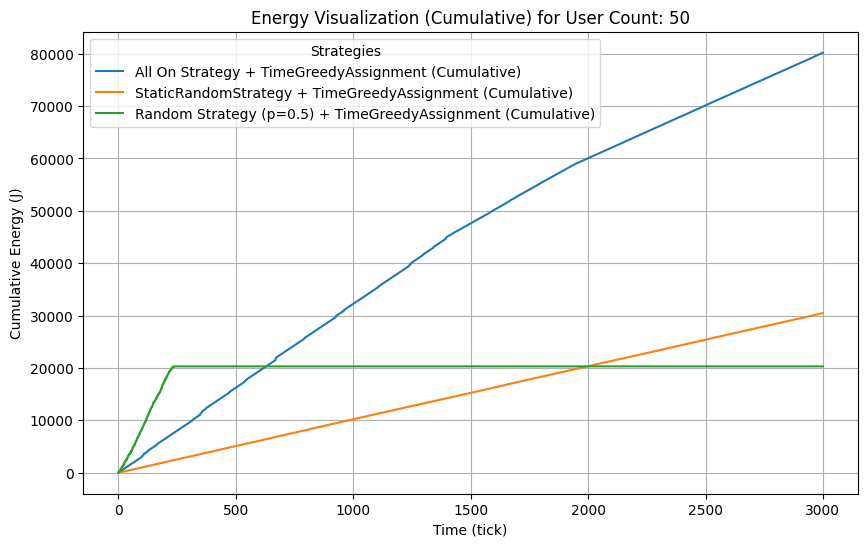

In [250]:
# Example: Plot cumulative energy for selected strategies and assignments
plot_energy(
    dict_df,
    power_strategy=["All On Strategy", "StaticRandomStrategy", "Random Strategy (p=0.5)"],
    assignment_strategy=["TimeGreedyAssignment"],
    user_count=50,
    mode="cumulative",  # "cumulative" or "per_tick"
    # include_nodes=["HAPS 0"]  # Optional: Include specific nodes
)


In [234]:

# Example: Plot energy consumption per tick
plot_energy(
    dict_df,
    power_strategy=["All On Strategy", "random"],
    assignment_strategy=["timeGreedy"],
    user_count=100,
    mode="per_tick",  # "cumulative" or "per_tick"
    exclude_nodes=["LEO 0"]  # Optional: Exclude specific nodes
)


Looking for strategy key: 'All On Strategy + timeGreedy' with 100 users.
dict_keys(['All On Strategy + ClosestNodeAssignment', 'All On Strategy + EnergyGreedyAssignment', 'All On Strategy + HAPSOnlyAssignment', 'All On Strategy + TimeGreedyAssignment', 'Random Strategy (p=0.5) + ClosestNodeAssignment', 'Random Strategy (p=0.5) + EnergyGreedyAssignment', 'Random Strategy (p=0.5) + HAPSOnlyAssignment', 'Random Strategy (p=0.5) + RandomAssignment', 'Random Strategy (p=0.5) + TimeGreedyAssignment', 'StaticRandomStrategy + ClosestNodeAssignment', 'StaticRandomStrategy + EnergyGreedyAssignment', 'StaticRandomStrategy + HAPSOnlyAssignment', 'StaticRandomStrategy + TimeGreedyAssignment'])

No run found for strategy 'All On Strategy + timeGreedy' with 100 users.
Looking for strategy key: 'random + timeGreedy' with 100 users.
dict_keys(['All On Strategy + ClosestNodeAssignment', 'All On Strategy + EnergyGreedyAssignment', 'All On Strategy + HAPSOnlyAssignment', 'All On Strategy + TimeGreedyAssig

<Figure size 1000x600 with 0 Axes>